In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Generate Dummy Data
np.random.seed(42)
n_samples = 1000

# Features (Independent Variables)
advertising_spending = np.random.uniform(1000, 5000, n_samples)
customer_reviews = np.random.uniform(3, 5, n_samples)
seasonal_trends = np.random.uniform(-10, 10, n_samples)
competitor_pricing = np.random.uniform(50, 200, n_samples)


beta_0 = 5
beta_1 = 2
beta_2 = 3
beta_3 = -1
beta_4 = 0.5

# Dependent Variable (Sales)
sales = beta_0 + beta_1 * advertising_spending + beta_2 * customer_reviews + beta_3 * seasonal_trends + beta_4 * competitor_pricing + np.random.normal(0, 50, n_samples)

# Create DataFrame
df = pd.DataFrame({
    'Advertising': advertising_spending,
    'CustomerReviews': customer_reviews,
    'SeasonalTrends': seasonal_trends,
    'CompetitorPricing': competitor_pricing,
    'Sales': sales
})

# Save data to CSV
df.to_csv('online_retail_sales_data.csv', index=False)

# Display the first few rows of the generated data
df.head()


,Advertising,CustomerReviews,SeasonalTrends,CompetitorPricing,Sales
0,2498.160475,3.370266,-4.765886,150.905449,5158.082401
1,4802.857226,4.083802,-5.060424,169.502210,9728.436609
2,3927.975767,4.745892,8.125092,87.570185,7880.524041
3,3394.633937,4.464450,-5.009076,143.731115,6907.331066
4,1624.074562,4.613122,-4.561005,135.761897,3316.475929


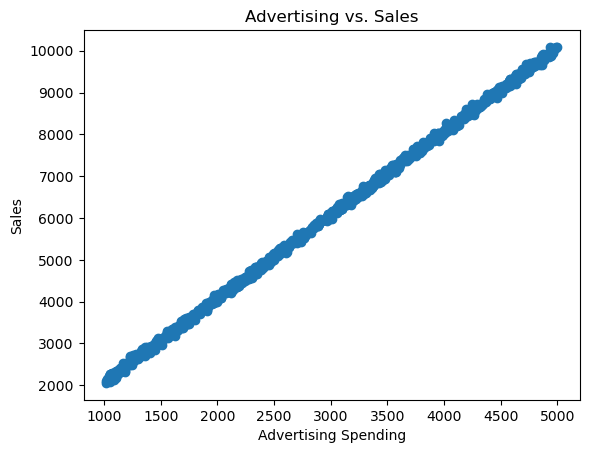

Coefficients:
             Feature  Coefficient
0        Advertising     1.998869
1    CustomerReviews     2.992893
2     SeasonalTrends    -0.914590
3  CompetitorPricing     0.457826

Model Evaluation:
Mean Absolute Error (MAE): 40.73336389481652
Mean Squared Error (MSE): 2629.0381807262393
Root Mean Squared Error (RMSE): 51.27414729399446


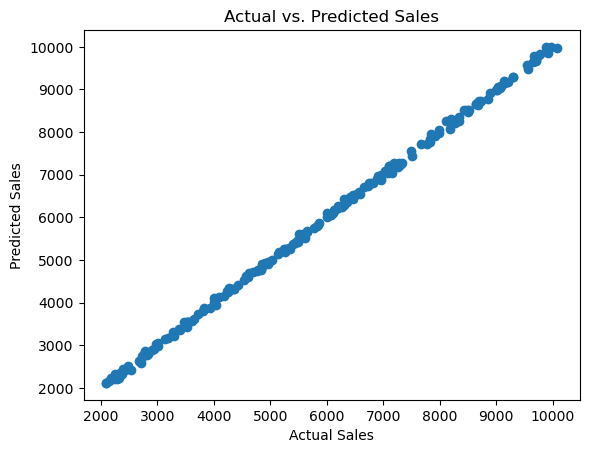

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the generated data
df = pd.read_csv('online_retail_sales_data.csv')

# Display the first few rows of the data
df.head()

# Plotting the data
plt.scatter(df['Advertising'], df['Sales'])
plt.title('Advertising vs. Sales')
plt.xlabel('Advertising Spending')
plt.ylabel('Sales')
plt.show()

# Selecting features (independent variables) and the target variable
X = df[['Advertising', 'CustomerReviews', 'SeasonalTrends', 'CompetitorPricing']]
y = df['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print('Coefficients:')
print(coefficients)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('\nModel Evaluation:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualizing the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


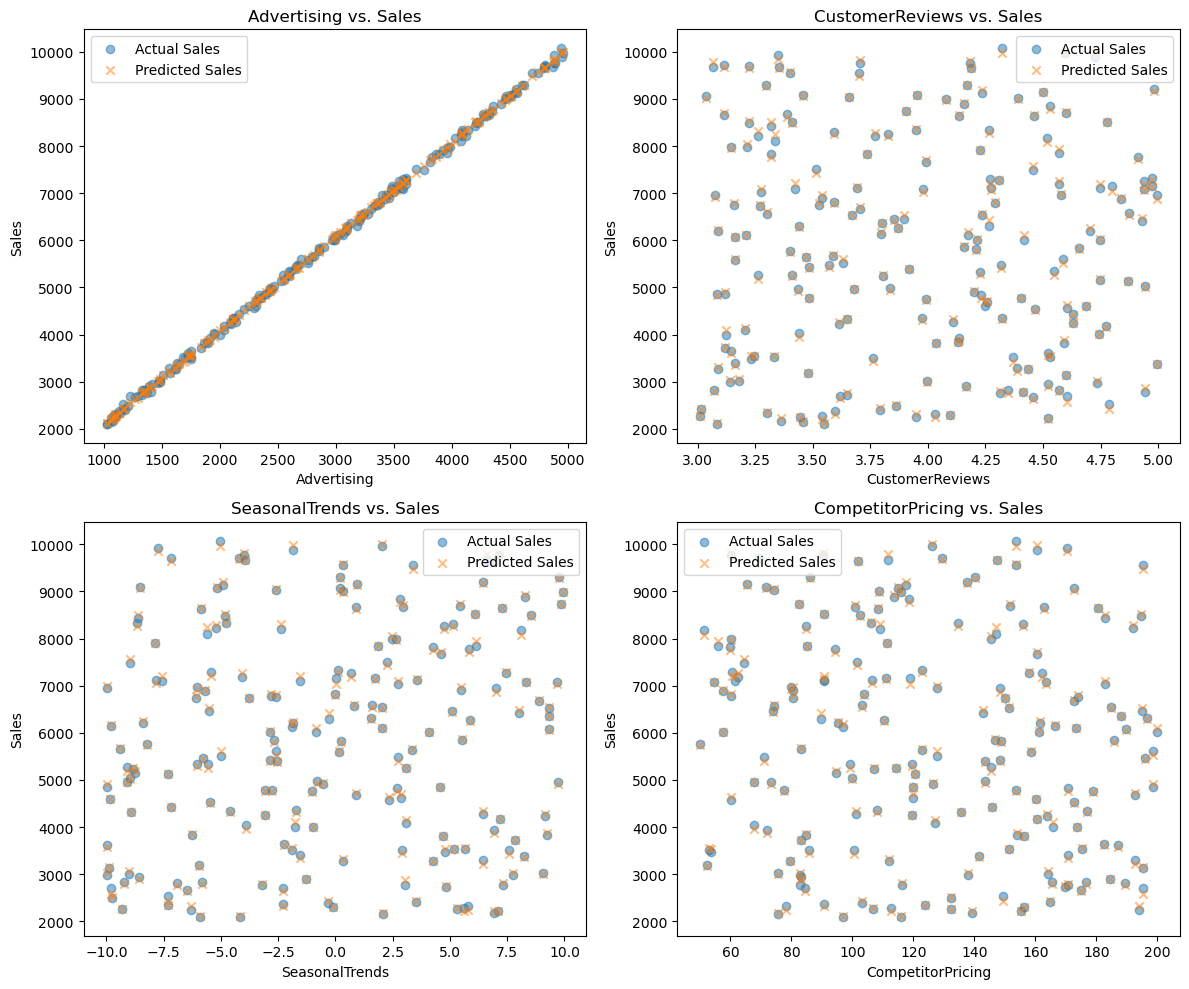

In [3]:
# Visualizing the predicted vs. actual values with a scatter plot and regression line
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, feature in enumerate(X.columns):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(X_test[feature], y_test, label='Actual Sales', marker='o', alpha=0.5)
    axes[row, col].scatter(X_test[feature], y_pred, label='Predicted Sales', marker='x', alpha=0.5)
    axes[row, col].set_title(f'{feature} vs. Sales')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Sales')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

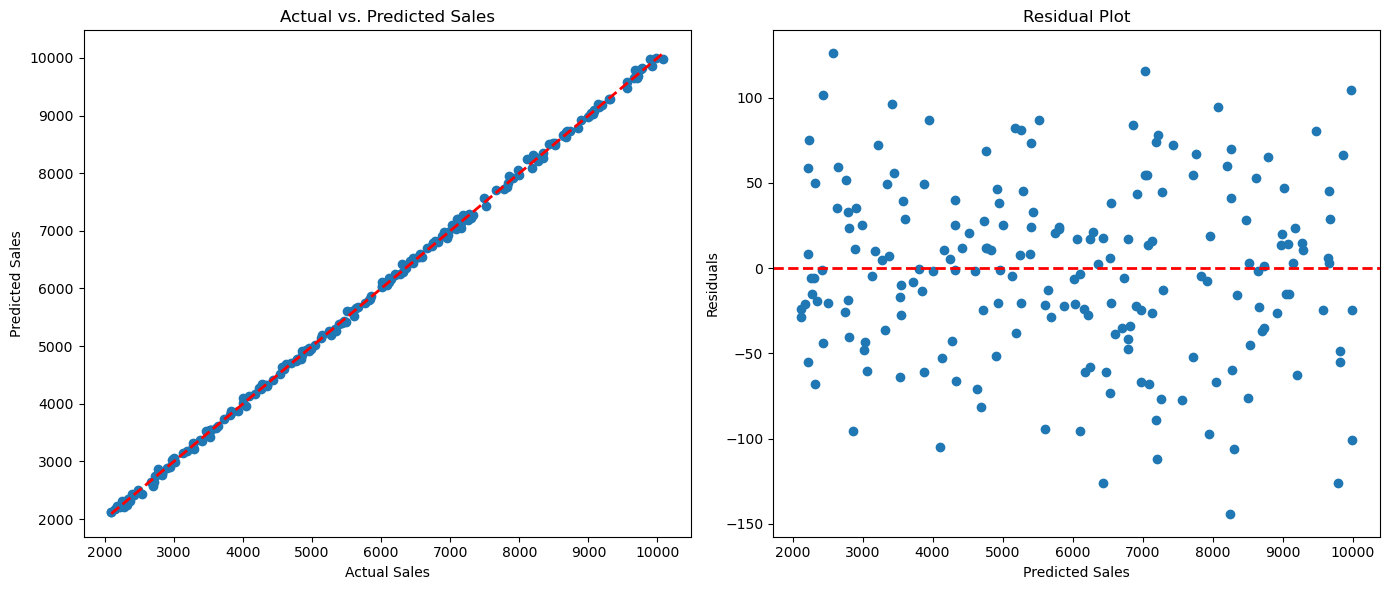

In [4]:
# Visualizing the predicted vs. actual values with a residual plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Scatter plot with a regression line
axes[0].scatter(y_test, y_pred)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axes[0].set_title('Actual vs. Predicted Sales')
axes[0].set_xlabel('Actual Sales')
axes[0].set_ylabel('Predicted Sales')

# Residual plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Sales')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()